EDA dữ liệu, xử lý dữ liệu dạng text, category, xử lý outlierm chạy thuật toán LR, KNN (tune tham số k), SVM (tune tham số kernel, C) cho dữ liệu:
1. https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
2. https://www.kaggle.com/goyalshalini93/car-price-prediction-linear-regression-rfe/data

In [56]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [50]:
dt = pd.read_csv("https://raw.githubusercontent.com/hongnhungyknb1925/DATA-PREPARATION-/main/week%207/CarPrice_Assignment.csv")
del dt['car_ID']
dt.head(n= 5 )

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [51]:
# EDA 
print(dt.shape)
print(dt.info())


(205, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    

In [52]:
print(dt['doornumber'].unique())
dt['doornumber'] = dt['doornumber'].str.replace('two', '2')
dt['doornumber'] = dt['doornumber'].str.replace('four', '4')
dt['doornumber'] = dt['doornumber'].astype(int) 
dt.head(4)
print(dt['doornumber'].dtypes)

['two' 'four']
int64


In [53]:
dt.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [65]:
corr = dt.corr()
corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.00,-0.66,-0.53,-0.36,-0.23,-0.54,-0.23,-0.11,-0.13,-0.01,-0.18,0.07,0.27,-0.04,0.03,-0.08
doornumber,-0.66,1.00,0.45,0.40,0.21,0.55,0.20,0.02,0.12,-0.01,0.18,-0.13,-0.25,-0.01,-0.04,0.03
wheelbase,-0.53,0.45,1.00,0.87,0.80,0.59,0.78,0.57,0.49,0.16,0.25,0.35,-0.36,-0.47,-0.54,0.58
carlength,-0.36,0.40,0.87,1.00,0.84,0.49,0.88,0.68,0.61,0.13,0.16,0.55,-0.29,-0.67,-0.70,0.68
carwidth,-0.23,0.21,0.80,0.84,1.00,0.28,0.87,0.74,0.56,0.18,0.18,0.64,-0.22,-0.64,-0.68,0.76
carheight,-0.54,0.55,0.59,0.49,0.28,1.00,0.30,0.07,0.17,-0.06,0.26,-0.11,-0.32,-0.05,-0.11,0.12
curbweight,-0.23,0.20,0.78,0.88,0.87,0.30,1.00,0.85,0.65,0.17,0.15,0.75,-0.27,-0.76,-0.80,0.84
enginesize,-0.11,0.02,0.57,0.68,0.74,0.07,0.85,1.00,0.58,0.20,0.03,0.81,-0.24,-0.65,-0.68,0.87
boreratio,-0.13,0.12,0.49,0.61,0.56,0.17,0.65,0.58,1.00,-0.06,0.01,0.57,-0.25,-0.58,-0.59,0.55
stroke,-0.01,-0.01,0.16,0.13,0.18,-0.06,0.17,0.20,-0.06,1.00,0.19,0.08,-0.07,-0.04,-0.04,0.08


In [68]:
dt1 =  dt[['wheelbase','carlength','carwidth','curbweight','carheight','enginesize','boreratio','horsepower','citympg','highwaympg','price']]
corr2 = dt1.corr()
corr2.style.background_gradient(cmap = 'coolwarm').set_precision(2)


,wheelbase,carlength,carwidth,curbweight,carheight,enginesize,boreratio,horsepower,citympg,highwaympg,price
wheelbase,1.00,0.87,0.80,0.78,0.59,0.57,0.49,0.35,-0.47,-0.54,0.58
carlength,0.87,1.00,0.84,0.88,0.49,0.68,0.61,0.55,-0.67,-0.70,0.68
carwidth,0.80,0.84,1.00,0.87,0.28,0.74,0.56,0.64,-0.64,-0.68,0.76
curbweight,0.78,0.88,0.87,1.00,0.30,0.85,0.65,0.75,-0.76,-0.80,0.84
carheight,0.59,0.49,0.28,0.30,1.00,0.07,0.17,-0.11,-0.05,-0.11,0.12
enginesize,0.57,0.68,0.74,0.85,0.07,1.00,0.58,0.81,-0.65,-0.68,0.87
boreratio,0.49,0.61,0.56,0.65,0.17,0.58,1.00,0.57,-0.58,-0.59,0.55
horsepower,0.35,0.55,0.64,0.75,-0.11,0.81,0.57,1.00,-0.80,-0.77,0.81
citympg,-0.47,-0.67,-0.64,-0.76,-0.05,-0.65,-0.58,-0.80,1.00,0.97,-0.69
highwaympg,-0.54,-0.70,-0.68,-0.80,-0.11,-0.68,-0.59,-0.77,0.97,1.00,-0.70


In [70]:
# del cor > 0.85 : wheel base, car length , citympg 
dt1 =  dt1[['carwidth','curbweight','carheight','enginesize','boreratio','horsepower','highwaympg','price']]

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


carwidth          AxesSubplot(0.125,0.71587;0.168478x0.16413)
curbweight     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
carheight      AxesSubplot(0.529348,0.71587;0.168478x0.16413)
enginesize     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
boreratio        AxesSubplot(0.125,0.518913;0.168478x0.16413)
horsepower    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
highwaympg    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
price         AxesSubplot(0.731522,0.518913;0.168478x0.16413)
dtype: object

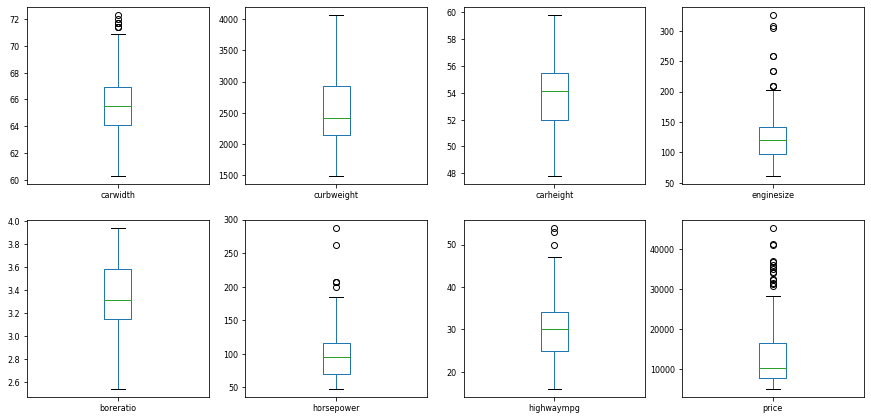

In [71]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
dt1.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8, ax=ax)

In [72]:
from sklearn.model_selection import train_test_split
X = dt1[['carwidth','curbweight','carheight','enginesize','boreratio','horsepower','highwaympg']]
Y = dt1[['price']]
X_train, X_test , y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)
print(len(X_train))

143


In [74]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train,y_train)
prd = model.predict(X_test)

In [77]:
from sklearn import metrics
print('MAS', metrics.mean_absolute_error(y_test,prd))
print('MAPE',metrics.mean_absolute_percentage_error(y_test,prd))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,prd)))
print('R-Square',model.score(X_train,y_train))

MAS 2811.7788467144323
MAPE 0.23122101366563563
RMSE 4016.6473905768707
R-Square 0.8427101004183328


SVR

In [88]:
dt2 = dt[['symboling','doornumber',	'wheelbase',	'carlength'	,'carwidth'	,'carheight',	'curbweight'	,'enginesize',	'boreratio',	'stroke'	,'compressionratio'	,'horsepower','peakrpm' ,'citympg',	'highwaympg',	'price']]
x = dt2.iloc[:,0:15]
y = dt2['price']
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)


In [89]:
from sklearn.svm import SVR 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import  svm, datasets
from sklearn.model_selection import  GridSearchCV
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
parameters={'kernel':['linear','rbf'],'C':[0.1,1,10]}
svc=svm.SVR()
clf=GridSearchCV(svc,param_grid=parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [98]:
clf.best_params_


{'C': 10, 'kernel': 'linear'}

MAE: 3145.335061123015
MSE: 31150665.537334614
RMSE: 5581.278127573882
R-Square 0.5883553298561255
       y_test       Predict
15   18050.89  18050.887033
9    15276.08  15276.082542
100  10920.68  10920.677914
132  13813.55  13813.545164
68   18598.51  18598.506367
95    8160.35   8160.354891
159   8214.02   8214.017479
162   9139.99   9139.991881
147  11774.13  11774.133316
182   8517.14   8517.143778


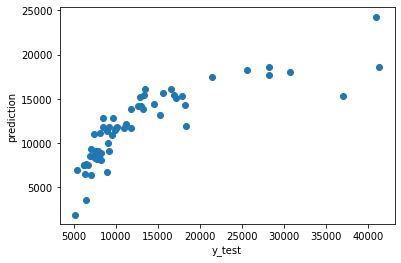

In [101]:
pred = clf.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R-Square',clf.score(x_train,y_train))
data = pd.DataFrame({'y_test':y_test,'Predict':pred})
data['y_test']= round(data['Predict'],2)
print(data.head(10))
fig, ax = plt.subplots()
ax.scatter(y_test,pred)
ax.set_xlabel('y_test')
ax.set_ylabel('prediction')
plt.show()

In [115]:
#  nhaps 
regr = make_pipeline(StandardScaler(), SVR(kernel='linear',C = 10, epsilon =0.001))
regr.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=10, epsilon=0.001, kernel='linear'))])

In [118]:
svr = regr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, svr))
print('MSE:', metrics.mean_squared_error(y_test, svr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr)))
print('R-Square',regr.score(x_train,y_train))
r2 = regr.score(x_train,y_train)
print('Adjust R_square', 1 - ((1 - r2) * (len(x_train) - 1) / (len(x_train) - 15 - 1)) )

MAE: 3145.337768192668
MSE: 31150996.413148146
RMSE: 5581.307769076003
R-Square 0.5883476507068577
Adjust R_square 0.5397272944911322


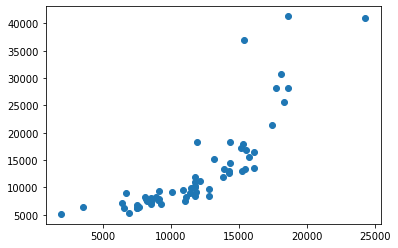

In [117]:
plt.scatter(svr, y_test)

In [120]:
data = pd.DataFrame({'y_test':y_test,'Predict':svr})
data['y_test']= round(data['Predict'],2)
print(data.head(10))

       y_test       Predict
15   18050.80  18050.802565
9    15275.82  15275.817214
100  10920.69  10920.693297
132  13813.48  13813.478295
68   18598.64  18598.641402
95    8160.24   8160.235901
159   8214.08   8214.082298
162   9139.98   9139.981426
147  11774.12  11774.116219
182   8517.11   8517.110534
[18050.80256479 15275.81721366 10920.69329703 13813.47829498
 18598.64140204  8160.23590111  8214.08229847  9139.98142611
 11774.11621892  8517.11053365 13865.72371872  8929.22012885
 14353.32046685 11741.58930797 24256.79341201  7682.03513808
  1931.27668914 14238.63997983 11132.15261433 11449.43464933
 11790.02465383 16121.71623366  8092.67024561  3545.50269227
  7520.51340084 18558.12412568 12804.27843669 15403.74127956
  8533.53231003 15185.29472519 18279.25717074  7493.45315455
  9129.54051928 17407.42029978  9088.0503655  17739.55130015
 12160.70405226 11742.23378371  6678.49803823 14364.31249544
 11049.90361916 11878.99555273 15705.85894107  8549.63391844
  8257.62272064 10056